## Time Series Prediction

##### We implement time series models (ARIMA, SAMIRA, and Prophet) to predict future sales using historical data.

In [1]:
! pip install Prophet

#### Import Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

#### Load and Preprocess Data

In [9]:
df =pd.read_csv('/Users/hpourmand/Desktop/Retail/PreparedDataset.csv')

# Ensuring the date is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])  
df.set_index('Order Date', inplace=True)

# Aggregate sales data by date
daily_sales = df['Sales'].resample('D').sum()

# 80% train, 20% test
split_ratio = 0.8
split_point = int(len(daily_sales) * split_ratio)
train_data = daily_sales[:split_point]
test_data = daily_sales[split_point:]

### ARIMA Model

#### Fit ARIMA model on the training data

In [10]:
arima_model = ARIMA(train_data, order=(1, 1, 1))
arima_result = arima_model.fit()

#### Forecast for the length of the test set

In [28]:
arima_forecast = arima_result.forecast(steps=len(test_data))
arima_forecast

2018-03-14    1355.343329
2018-03-15    1167.877535
2018-03-16    1157.649551
2018-03-17    1157.091520
2018-03-18    1157.061074
                 ...     
2018-12-26    1157.059317
2018-12-27    1157.059317
2018-12-28    1157.059317
2018-12-29    1157.059317
2018-12-30    1157.059317
Freq: D, Name: predicted_mean, Length: 292, dtype: float64

#### Plot the results

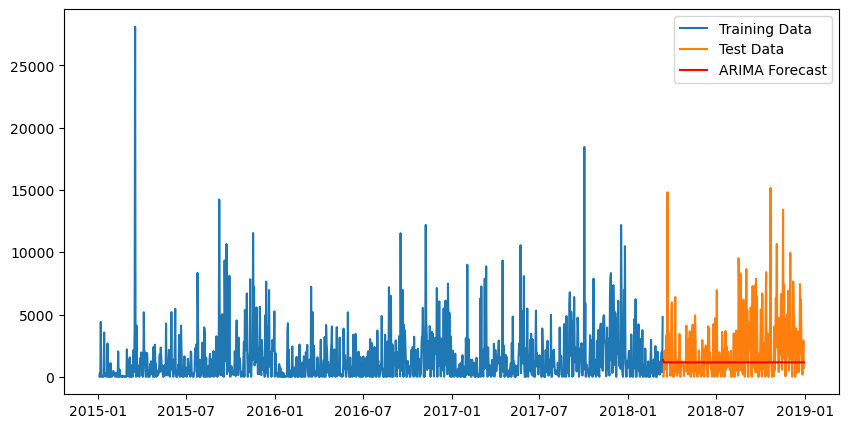

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.legend()
plt.show()

#### Calculate RMSE for ARIMA

In [13]:
arima_rmse = np.sqrt(mean_squared_error(test_data, arima_forecast))
print("ARIMA RMSE:", arima_rmse)

ARIMA RMSE: 2712.2706291168392


### SARIMA Model

#### Fit SARIMA model on the training data

In [15]:
sarima_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.19261D+00    |proj g|=  7.27841D-02


 This problem is unconstrained.



At iterate    5    f=  9.12877D+00    |proj g|=  1.11152D-02

At iterate   10    f=  9.12688D+00    |proj g|=  8.77885D-04

At iterate   15    f=  9.12682D+00    |proj g|=  1.78652D-04

At iterate   20    f=  9.12589D+00    |proj g|=  1.81814D-03

At iterate   25    f=  9.01047D+00    |proj g|=  1.60621D-01

At iterate   30    f=  8.97199D+00    |proj g|=  4.74013D-03

At iterate   35    f=  8.97145D+00    |proj g|=  4.17569D-04

At iterate   40    f=  8.97137D+00    |proj g|=  7.99437D-05

At iterate   45    f=  8.97136D+00    |proj g|=  2.58626D-04

At iterate   50    f=  8.97136D+00    |proj g|=  1.30711D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Forecast for the length of the test set

In [27]:
sarima_forecast = sarima_result.forecast(steps=len(test_data))
sarima_forecast

2018-03-14    1663.377971
2018-03-15    1148.971027
2018-03-16     929.235844
2018-03-17    1228.527554
2018-03-18     940.297992
                 ...     
2018-12-26    1293.184976
2018-12-27    1648.979551
2018-12-28    1351.407082
2018-12-29    1056.312479
2018-12-30    1394.185780
Freq: D, Name: predicted_mean, Length: 292, dtype: float64

#### Plot the results

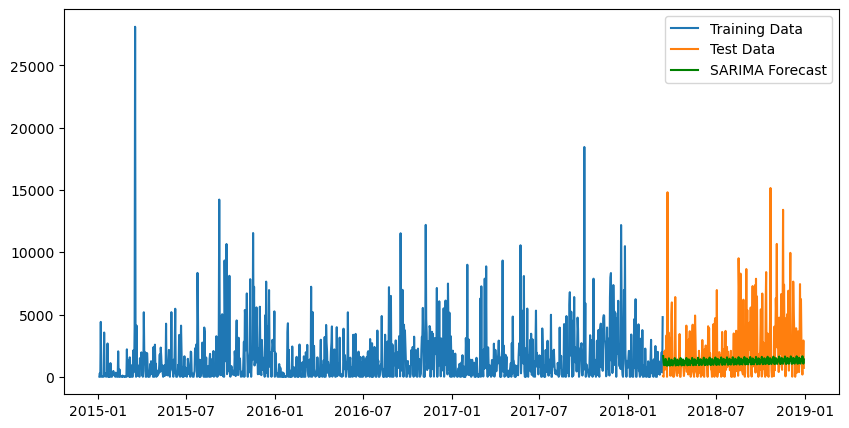

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', color='green')
plt.legend()
plt.show()

#### Calculate RMSE for SARIMA

In [18]:
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_forecast))
print("SARIMA RMSE:", sarima_rmse)

SARIMA RMSE: 2676.7170511681543


### PROPHET Model

#### Prepare the data for Prophet

In [19]:
prophet_train_data = train_data.reset_index()
prophet_train_data.columns = ['ds', 'y']

#### Initialize and fit the model

In [21]:
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(prophet_train_data)

12:56:13 - cmdstanpy - INFO - Chain [1] start processing
12:56:13 - cmdstanpy - INFO - Chain [1] done processing


#### Define future dates

In [22]:
future_dates = prophet_model.make_future_dataframe(periods=len(test_data))

#### Make predictions

In [23]:
prophet_forecast = prophet_model.predict(future_dates)

#### Plot the results

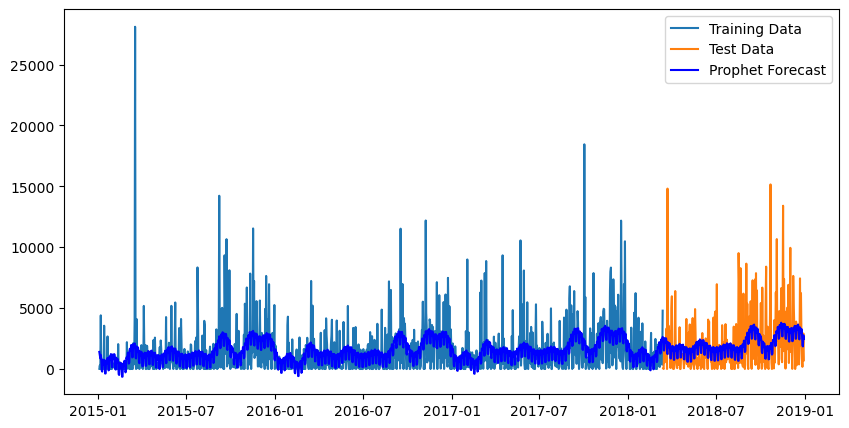

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(prophet_forecast['ds'], prophet_forecast['yhat'], label='Prophet Forecast', color='blue')
plt.legend()
plt.show()

#### Calculate RMSE for Prophet

In [25]:
prophet_rmse = np.sqrt(mean_squared_error(test_data, prophet_forecast['yhat'][-len(test_data):]))
print("Prophet RMSE:", prophet_rmse)

Prophet RMSE: 2402.593739248853


In [26]:
print("Model Performance Summary:")
print("ARIMA RMSE:", arima_rmse)
print("SARIMA RMSE:", sarima_rmse)
print("Prophet RMSE:", prophet_rmse)

Model Performance Summary:
ARIMA RMSE: 2712.2706291168392
SARIMA RMSE: 2676.7170511681543
Prophet RMSE: 2402.593739248853
